In [17]:
import numpy as np
from click.core import batch
from keras import datasets, layers, models, utils, preprocessing, Sequential
import matplotlib.pyplot as plt
from keras.src.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.api.preprocessing import image

In [18]:
batch_size=128
nb_classes=10
nb_epoch=25
img_rows, img_cols = 32,32
img_channels = 3
classes=['самолет','автомобиль','птица','кот','олень',
         'собака','лягушка','лошадь','корабль','грузовик']
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

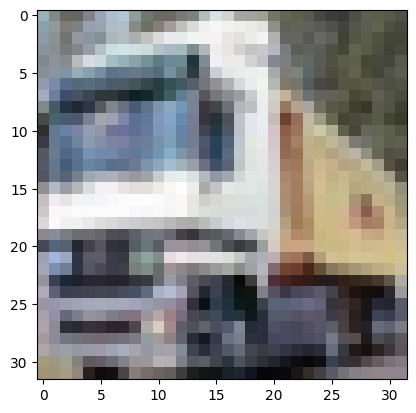

Номер класса: [9]
Тип объекта: грузовик


In [19]:
plt.imshow(x_train[1])
plt.show()
print("Номер класса:",y_train[1])
print("Тип объекта:",classes[y_train[1][0]])

In [20]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train=utils.to_categorical(y_train,nb_classes)
y_test=utils.to_categorical(y_test,nb_classes)

In [21]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=nb_epoch,validation_split=0.1, shuffle=True,verbose=2)

Epoch 1/25
352/352 - 62s - 176ms/step - accuracy: 0.3847 - loss: 1.6825 - val_accuracy: 0.5442 - val_loss: 1.2755
Epoch 2/25
352/352 - 88s - 250ms/step - accuracy: 0.5555 - loss: 1.2416 - val_accuracy: 0.6290 - val_loss: 1.0488
Epoch 3/25
352/352 - 73s - 207ms/step - accuracy: 0.6267 - loss: 1.0563 - val_accuracy: 0.6756 - val_loss: 0.9286
Epoch 4/25
352/352 - 75s - 213ms/step - accuracy: 0.6683 - loss: 0.9381 - val_accuracy: 0.7112 - val_loss: 0.8194
Epoch 5/25
352/352 - 64s - 182ms/step - accuracy: 0.7002 - loss: 0.8535 - val_accuracy: 0.7276 - val_loss: 0.7884
Epoch 6/25
352/352 - 60s - 170ms/step - accuracy: 0.7204 - loss: 0.7922 - val_accuracy: 0.7444 - val_loss: 0.7361
Epoch 7/25
352/352 - 78s - 221ms/step - accuracy: 0.7403 - loss: 0.7403 - val_accuracy: 0.7624 - val_loss: 0.6929
Epoch 8/25
352/352 - 62s - 177ms/step - accuracy: 0.7560 - loss: 0.6939 - val_accuracy: 0.7700 - val_loss: 0.6917
Epoch 9/25
352/352 - 55s - 157ms/step - accuracy: 0.7667 - loss: 0.6634 - val_accuracy: 

In [24]:
scores=model.evaluate(x_test,y_test,verbose=0)
print("Точность работы на тестовых данных:%.2f"%(scores[1]*100))

Точность работы на тестовых данных:79.64


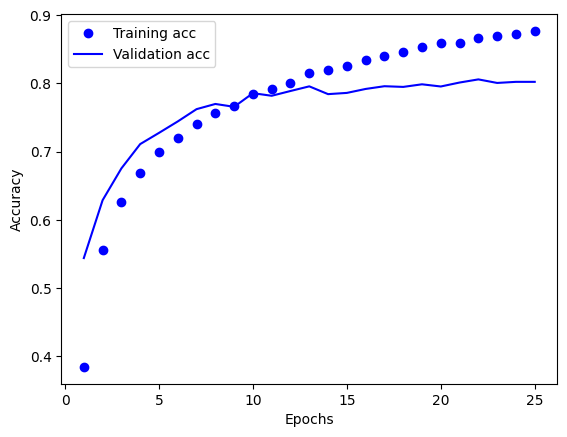

In [26]:
history_dict=history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model_json=model.to_json()
json_file=open("cifar10_model.json","w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10.weights.h5")

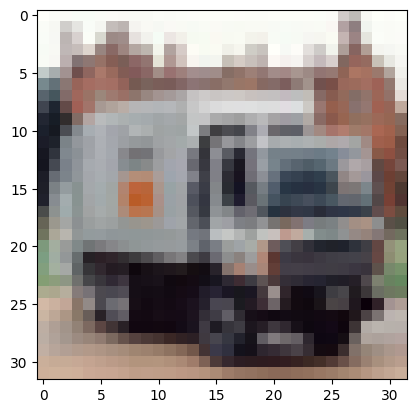

In [43]:
index=11
plt.imshow(image.array_to_img(x_test[index]))
plt.show()

In [60]:
x=x_test[index]
x=np.expand_dims(x,axis=0)

In [61]:
prediction=model.predict(x)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[8.5597973e-13 2.0130169e-07 4.2256429e-19 1.9062766e-17 2.4024342e-25
  1.3794898e-20 5.4200017e-18 3.4403133e-20 5.9004274e-14 9.9999976e-01]]


In [62]:
prediction=np.argmax(prediction)
print(classes[prediction])

грузовик


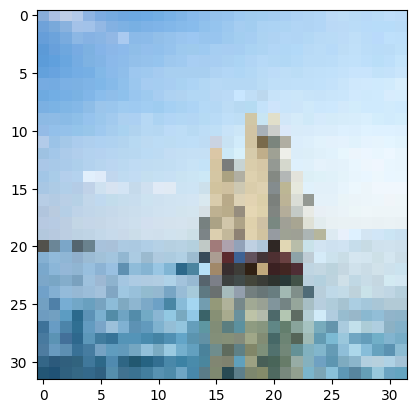

In [63]:
img_path='ship.jpg'
img=image.load_img(img_path,target_size=(32,32))
plt.imshow(img)
plt.show()

In [64]:
x=image.img_to_array(img)
x/=255
x=np.expand_dims(x,axis=0)

In [65]:
prediction=model.predict(x)
prediction=np.argmax(prediction)
print(classes[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
корабль
